In [36]:
! git clone https://github.com/ucfilho/ANN

Cloning into 'ANN'...
remote: Counting objects: 43, done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 11), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [37]:
!ls

ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [38]:
%cd ANN

/root/ANN/ANN


In [39]:
!ls

ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
DAT=pd.read_csv('Hydrofoil_ago_29_2018.csv')

In [42]:
Index=[2,3,4,5,6,7]
Dat_select=[]
Dat_select=DAT.iloc[:,Index].copy()
print(Dat_selec.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
def normaliza(x):
  strings=list(x) #listar as variáveis de cada coluna
  for i in strings:
    max_x=x[i].max()
    min_x=x[i].min()
    a=(max_x+min_x)/2
    b=(max_x-min_x)/2
    x[i]=(x[i]-a)/b
  return x #sair da funcao

In [44]:
DAT=normaliza(Dat_select)
print(DAT.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605


In [45]:
#separar meu bloco de dados em teste e treino, o treino sempre pega mais % pq depois com o teste eu vou só provar que minha rede está correta

train=DAT.sample(frac=0.8, random_state=None) #vai pegar 80% dos dados e usar no treina. O resto vai usar no teste. random_state=None vai gerar sempre uma sequencia de numeros aleatórios diferente, quais numeros ele vai selecionar. 
test=DAT.drop(train.index) #drop é o que sobrou 
train.head()

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
58,1.000000,0.866897,0.520833,1.000000,0.190414,0.419620
49,1.000000,-0.308557,-0.210937,-0.324422,0.618822,-0.727204
29,-0.333333,0.866897,0.901042,0.728694,0.368848,0.774525
1,-1.000000,-0.913570,-0.986458,-0.895478,-0.459481,-0.999415
27,-0.333333,0.688850,0.651042,0.674476,0.376579,0.394181


In [0]:
#separar meu bloco de dados em teste e treino, o treino sempre pega mais % pq depois com o teste eu vou só provar que minha rede está correta
#train=DAT.sample(frac=0.8, random_state=1) #vai pegar 80% dos dados e usar no treina. O resto vai usar no teste. random_state=1 vai sempre gerar a mesma sequencia de numeros aleatórios, quais numeros ele vai selecionar. 
#test=DAT.drop(train.index) #drop é o que sobrou 
#train.head()

In [52]:
Indice=[0,1] #cria uma lista que depois vai fazer ref as colunas
train_x=[]
train_x=train.iloc[:,Indice].copy() #iloc vai varrer todas as linhas das duas primeiras colunas (Indice) e armazenar em train_x, #pegando as duas primeiras colunas que sao as entradas para treinar
test_x=[]
test_x=test.iloc[:,Indice].copy()
Indice=[2,3,4,5] #pegando as colunas da saida
train_y=[]
train_y=train.iloc[:,Indice].copy()
test_y=[]
test_y=test.iloc[:,Indice].copy()
train_x.head()

,Hydrofoil,Froude
49,1.000000,-0.308557
2,-1.000000,-0.896283
35,0.333333,-0.308557
47,1.000000,-0.654278
39,0.333333,0.382887


In [61]:
#chamaremos agora a rede neural se eu tivesse no PC teria que instalar o sklearn

from sklearn.neural_network import MLPRegressor     #multi layer regressao
clf=MLPRegressor(solver='lbfgs', activation='tanh', alpha=1e-5, hidden_layer_sizes=(9,8), random_state=1)     #usa purelin como funcao de ativaçao na entrada e na saida e a tg hiperbólica para a fc de ativaçao da camada oculta. 2 camasas ocultas: 1 com 9 neuronios e outra com 8 neuronios.
clf.fit(train_x,train_y)



MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [62]:
w_train=clf.predict(train_x) #estou pedindo para a rede predizer a saida com os valores da entrada x. está em formato de lista
w_test=clf.predict(test_x)
print(w_test)

[[-1.01008565 -0.95738152 -0.66949461 -1.02650057]
 [-0.97916324 -0.94749843 -0.57390172 -1.02380352]
 [-0.91785501 -0.93370875 -0.43603392 -1.00438126]
 [-0.11336038 -0.48395086  0.8585443  -0.68027264]
 [-0.01755919 -0.17672342  0.79612862 -0.55858499]
 [ 0.182165    0.24675845  0.73405946 -0.28292472]
 [ 0.33091557  0.39461415  0.74639679 -0.0948642 ]
 [ 0.74956368  0.61088284  0.72487619  0.44796764]
 [ 1.12713845  0.70977663  0.61228683  0.96824317]
 [-0.01993058  0.27504575  0.54514235 -0.48004861]
 [ 0.65472791  0.8309536   0.29859293  0.50071661]
 [ 0.42282935  0.87981397  0.23516933  0.25918116]]


In [64]:
w_test=pd.DataFrame(w_test) #transformando em data frame, voltando o indice. 
col_names=list(train_y)
w_test.columns=col_names
print(w_test.head())

   Resistence   Sinkage      Trim     Power
0   -1.010086 -0.957382 -0.669495 -1.026501
1   -0.979163 -0.947498 -0.573902 -1.023804
2   -0.917855 -0.933709 -0.436034 -1.004381
3   -0.113360 -0.483951  0.858544 -0.680273
4   -0.017559 -0.176723  0.796129 -0.558585


In [65]:
w_train=pd.DataFrame(w_train) #transformando em data frame, voltando o indice. 
#col_names=list(train_y)
w_train.columns=col_names
print(w_train.head())

   Resistence   Sinkage      Trim     Power
0   -0.150589 -0.331154  0.728604 -0.723962
1   -0.969670 -0.945096 -0.550293 -1.021367
2   -0.133802 -0.378948  0.715428 -0.704199
3   -0.636428 -0.871508  0.015967 -0.946020
4    0.196740  0.639814  0.495706 -0.160176


In [69]:
DAT=pd.read_csv('Hydrofoil_ago_29_2018.csv')
DAT_select=[]
Indice=[4,5,6,7]
DAT_select=DAT.iloc[:,Indice].copy()
print(DAT_select.head())

   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


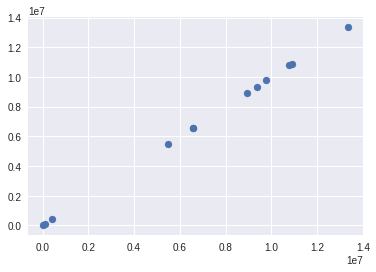

In [74]:
def original(x,x_old): #voltar aos dados originais, pq tava escalonado
  strings=list(x)
  for i in strings:
    max_x=x_old[i].max()
    min_x=x_old[i].min()
    a=(max_x+min_x)/2
    b=(max_x-min_x)/2
    x[i]=x[i]*b+a
  return x
w_train= original(train_y,DAT_select)
w_test= original(test_y,DAT_select)

test_y=original(test_y,DAT_select) #só com o y, pq eu quero comparar os meus dados da saída
y1= test_y['Resistence']
y2= w_test['Resistence']
plt.scatter(y1,y2)